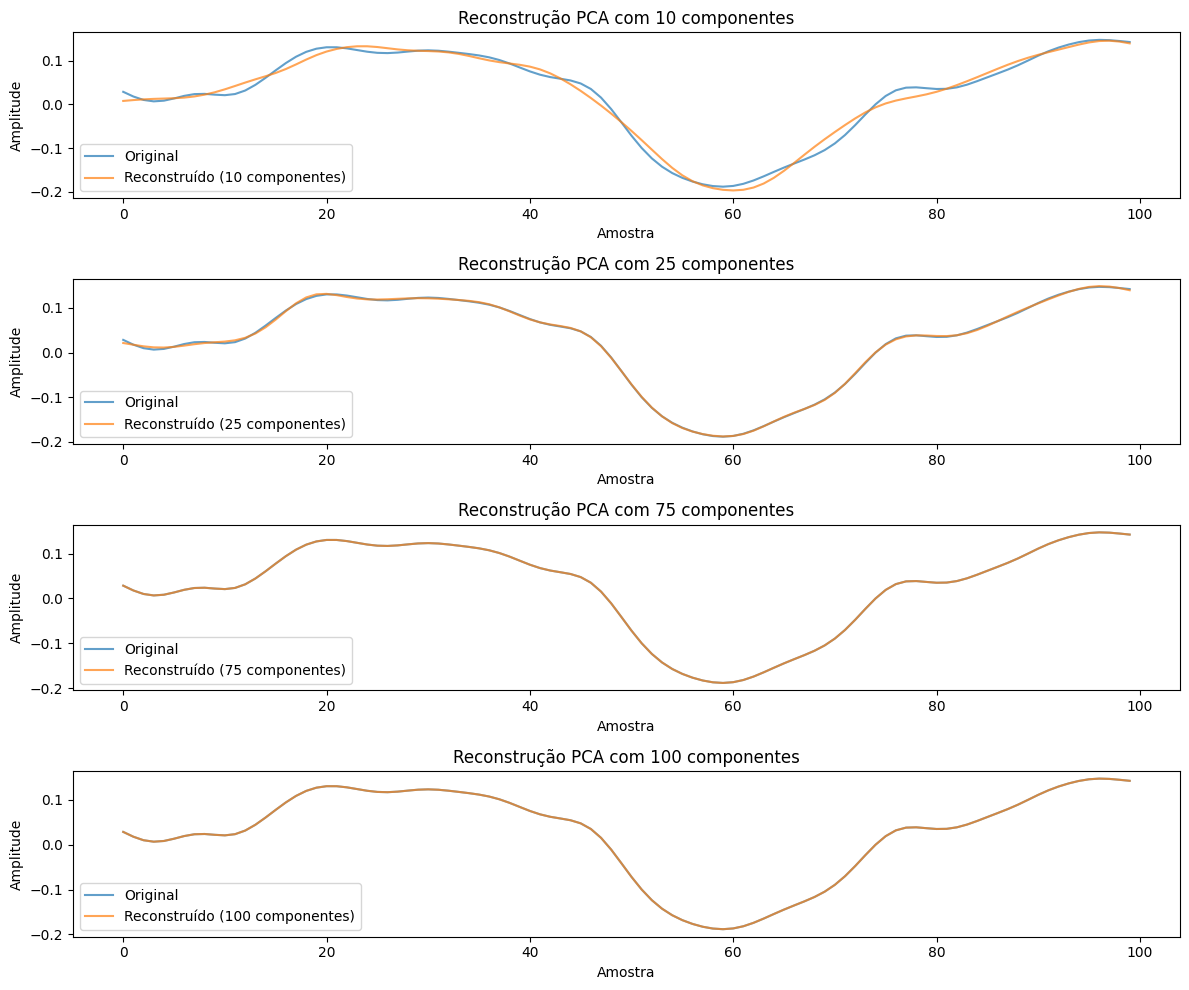

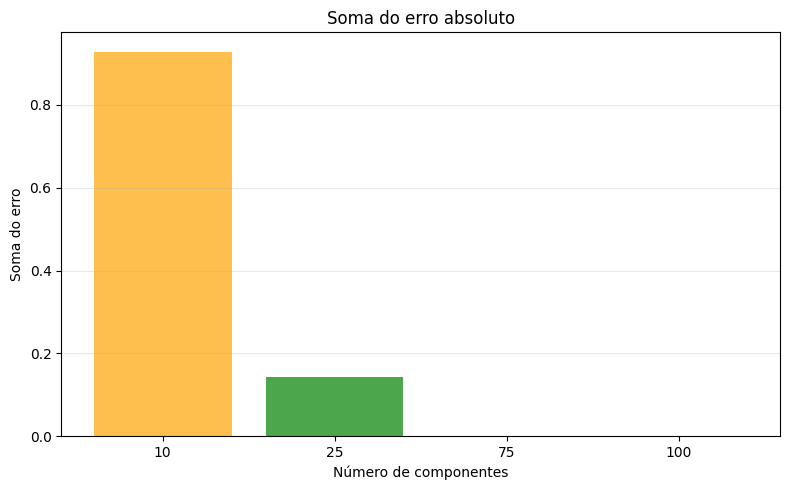

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import librosa

# === 1. Carregar o trecho entre 45s e 47s ===
arquivo = '13 - Impatient.wav'
offset = 45.0
duration = 2.0
audio, sr = librosa.load(arquivo, sr=None, mono=True, offset=offset, duration=duration)

# === 2. Dividir em quadros ===
frame_size = 100
hop_length = 80

def frame_audio(signal, frame_size, hop_length):
    n_frames = 1 + (len(signal) - frame_size) // hop_length
    frames = np.zeros((n_frames, frame_size))
    for i in range(n_frames):
        start = i * hop_length
        frames[i, :] = signal[start:start+frame_size]
    return frames

frames_no_overlap = frame_audio(audio, frame_size, frame_size)

# === 3. Aplicar PCA com diferentes números de componentes ===
componentes = [10, 25, 75, 100]
reconstructed = {}
soma_erros = {}

orig_frame = frames_no_overlap[0]

for n in componentes:
    pca = PCA(n_components=n)
    compressed = pca.fit_transform(frames_no_overlap)
    reconst = pca.inverse_transform(compressed)
    reconstructed[n] = reconst[0]
    diff = orig_frame - reconst[0]
    soma_erros[n] = np.sum(np.abs(diff))

# === 4. Plotagem das reconstruções ===
plt.figure(figsize=(12, 10))

# Para cada número de componentes, plota a reconstrução
for i, n in enumerate(componentes):
    plt.subplot(len(componentes), 1, i+1)
    plt.plot(orig_frame, label='Original', alpha=0.7)
    plt.plot(reconstructed[n], label=f'Reconstruído ({n} componentes)', alpha=0.7)
    plt.title(f'Reconstrução PCA com {n} componentes')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()

# === 5. Gráfico de barras para os erros ===
plt.figure(figsize=(8, 5))
plt.bar(
    [str(n) for n in componentes],
    [soma_erros[n] for n in componentes],
    color=['orange', 'green', 'blue', 'purple'],
    alpha=0.7
)
plt.title('Soma do erro absoluto')
plt.ylabel('Soma do erro')
plt.xlabel('Número de componentes')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


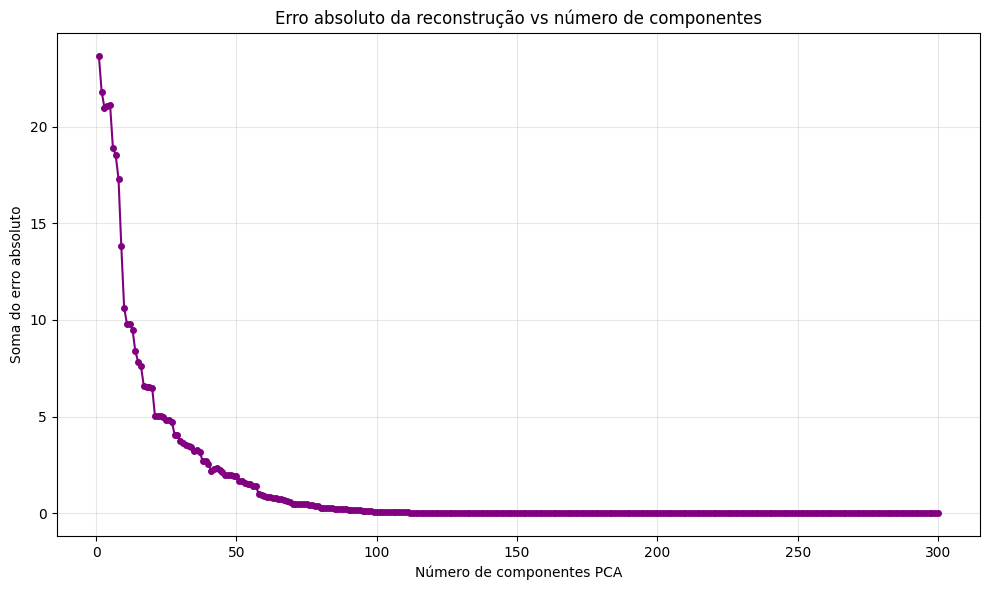

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import librosa

# === 1. Carregar o trecho entre 45s e 47s ===
arquivo = '13 - Impatient.wav'
offset = 45.0
duration = 2.0
audio, sr = librosa.load(arquivo, sr=None, mono=True, offset=offset, duration=duration)

# === 2. Dividir em quadros ===
frame_size = 300
hop_length = 120

def frame_audio(signal, frame_size, hop_length):
    n_frames = 1 + (len(signal) - frame_size) // hop_length
    frames = np.zeros((n_frames, frame_size))
    for i in range(n_frames):
        start = i * hop_length
        frames[i, :] = signal[start:start+frame_size]
    return frames

frames_no_overlap = frame_audio(audio, frame_size, frame_size)

# === 3. Original e lista para armazenar erros ===
orig_frame = frames_no_overlap[0]
erros = []

# === 4. Iterar por número de componentes (1 até frame_size) ===
for n_components in range(1, frame_size + 1):
    pca = PCA(n_components=n_components)
    compressed = pca.fit_transform(frames_no_overlap)
    reconst = pca.inverse_transform(compressed)
    diff = orig_frame - reconst[0]
    soma_erro = np.sum(np.abs(diff))
    erros.append(soma_erro)

# === 5. Plotagem da curva de erro ===
plt.figure(figsize=(10, 6))
plt.plot(range(1, frame_size+ 1), erros, marker='o', markersize=4, color='purple')
plt.title('Erro absoluto da reconstrução vs número de componentes')
plt.xlabel('Número de componentes PCA')
plt.ylabel('Soma do erro absoluto')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Starting exhaustive search for hop_length and n_components combinations...

--- Top 100 Combinações de hop_length e Número de Componentes (menor para maior erro) ---
1. Erro: 0.0000, hop_length: 180, Componentes: 296
2. Erro: 0.0000, hop_length: 205, Componentes: 296
3. Erro: 0.0000, hop_length: 235, Componentes: 296
4. Erro: 0.0000, hop_length: 155, Componentes: 296
5. Erro: 0.0000, hop_length: 250, Componentes: 296
6. Erro: 0.0000, hop_length: 270, Componentes: 296
7. Erro: 0.0000, hop_length: 50, Componentes: 296
8. Erro: 0.0000, hop_length: 230, Componentes: 296
9. Erro: 0.0000, hop_length: 95, Componentes: 296
10. Erro: 0.0000, hop_length: 225, Componentes: 296
11. Erro: 0.0000, hop_length: 240, Componentes: 296
12. Erro: 0.0000, hop_length: 160, Componentes: 296
13. Erro: 0.0000, hop_length: 105, Componentes: 296
14. Erro: 0.0000, hop_length: 210, Componentes: 296
15. Erro: 0.0000, hop_length: 190, Componentes: 296
16. Erro: 0.0000, hop_length: 265, Componentes: 296
17. Erro: 0.0

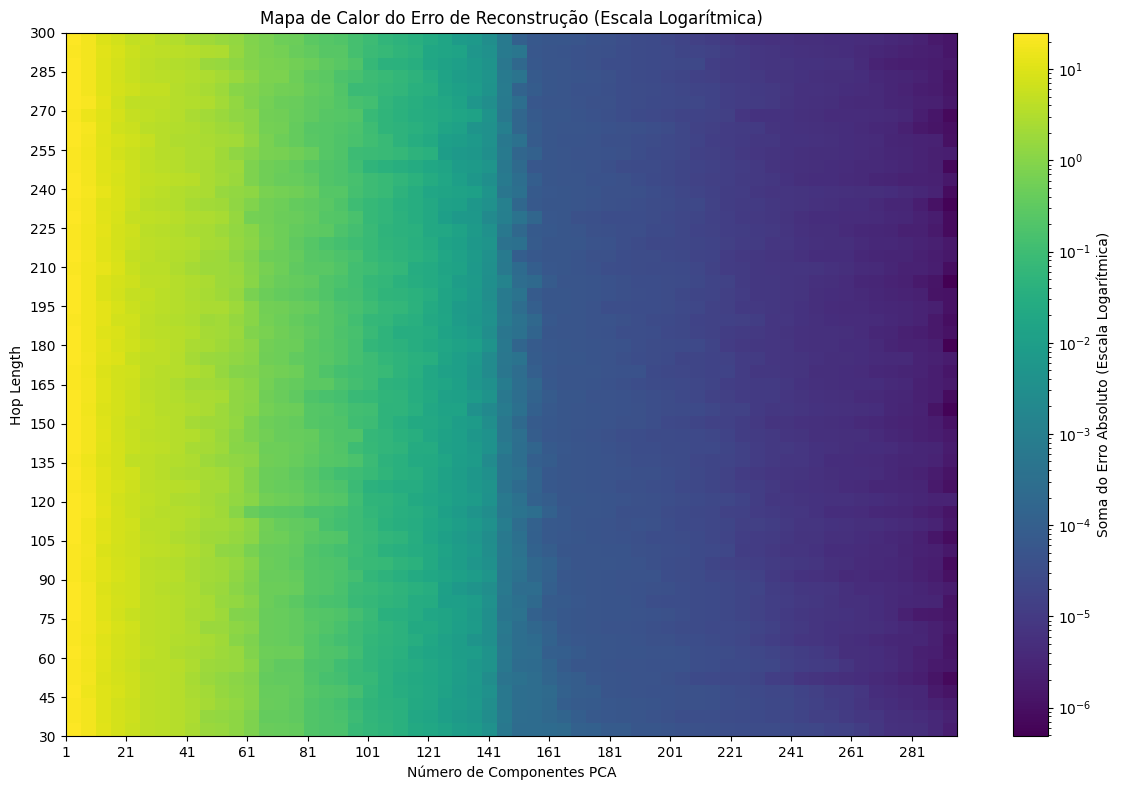

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import librosa
from matplotlib.colors import LogNorm # Import LogNorm

# === 1. Carregar o trecho entre 45s e 47s ===
arquivo = '13 - Impatient.wav'
offset = 45.0
duration = 2.0
audio, sr = librosa.load(arquivo, sr=None, mono=True, offset=offset, duration=duration)

# === 2. Função para dividir em quadros ===
def frame_audio(signal, frame_size, hop_length):
    n_frames = 1 + (len(signal) - frame_size) // hop_length
    frames = np.zeros((n_frames, frame_size))
    for i in range(n_frames):
        start = i * hop_length
        frames[i, :] = signal[start:start+frame_size]
    return frames

# === 3. Definir parâmetros para teste ===
frame_size = 300
# Increased resolution for hop_lengths and components
hop_lengths_to_test = np.arange(30, frame_size + 1, 5)  # Test hop_lengths from 30 to frame_size, step 5
components_to_test = np.arange(1, frame_size + 1, 5) # Test components from 1 to frame_size, step 5

# To store errors: dictionary with (hop_length, n_components) as key
error_map = {}

# === 4. Iterar por todas as combinações de hop_length e n_components ===
print("Starting exhaustive search for hop_length and n_components combinations...")
total_combinations = len(hop_lengths_to_test) * len(components_to_test)
processed_combinations = 0

for current_hop_length in hop_lengths_to_test:
    # print(f"  Processing hop_length: {current_hop_length}") # Uncomment for more detailed progress
    frames = frame_audio(audio, frame_size, current_hop_length)
    if frames.shape[0] == 0:
        # print(f"    No frames generated for hop_length {current_hop_length}. Skipping.")
        processed_combinations += len(components_to_test) # Account for skipped combinations
        continue

    orig_frame = frames[0] # Use the first frame for error calculation

    for n_components in components_to_test:
        processed_combinations += 1
        # Optional: Print progress
        # if processed_combinations % 100 == 0:
        #     print(f"    Progress: {processed_combinations}/{total_combinations} combinations")

        if n_components > frame_size: # Ensure n_components does not exceed feature dimension
            continue
        
        pca = PCA(n_components=n_components)
        
        # Fit PCA on all frames for this hop_length
        compressed = pca.fit_transform(frames)
        reconst = pca.inverse_transform(compressed)
        
        # Calculate error on the first frame's reconstruction
        diff = orig_frame - reconst[0]
        soma_erro = np.sum(np.abs(diff))
        error_map[(current_hop_length, n_components)] = soma_erro

# === 5. Listar combinações em ordem de erro crescente ===
if error_map:
    # Convert dictionary items to a list of (error, (hop_length, n_components)) tuples
    sorted_errors = sorted([(error, combo) for combo, error in error_map.items()])

    print("\n--- Top 100 Combinações de hop_length e Número de Componentes (menor para maior erro) ---")
    # Determine how many combinations to print (up to 100 or all if less than 100)
    num_to_print = min(100, len(sorted_errors))

    for i in range(num_to_print):
        error, (h_len, n_comp) = sorted_errors[i]
        print(f"{i+1}. Erro: {error:.4f}, hop_length: {h_len}, Componentes: {n_comp}")
    
    if len(sorted_errors) > 100:
        print(f"...")
        print(f"Total de combinações calculadas: {len(sorted_errors)}")
else:
    print("No errors were calculated. Please check the input parameters and data.")

# === 6. Plotagem do mapa de calor de erro (com escala logarítmica) ===
if error_map:
    # Prepare data for heatmap
    sorted_keys = sorted(error_map.keys())
    unique_hop_lengths = sorted(list(set([k[0] for k in sorted_keys])))
    unique_components = sorted(list(set([k[1] for k in sorted_keys])))

    error_matrix = np.zeros((len(unique_hop_lengths), len(unique_components)))

    # Find the minimum and maximum error for the LogNorm
    # Add a small epsilon to the minimum error if it's zero, as LogNorm can't handle 0
    min_error_val = min(error_map.values())
    max_error_val = max(error_map.values())
    
    # Ensure min_error_val is not zero for LogNorm
    if min_error_val <= 0:
        min_error_val = np.finfo(float).eps # Use smallest positive float if error is 0 or negative
        # Or, set a specific small value like 1e-6 if you know errors won't be that small naturally

    for i, h_len in enumerate(unique_hop_lengths):
        for j, n_comp in enumerate(unique_components):
            current_error = error_map.get((h_len, n_comp), np.nan)
            # Replace zero errors with a small epsilon for log scale
            if current_error <= 0 and not np.isnan(current_error):
                error_matrix[i, j] = np.finfo(float).eps
            else:
                error_matrix[i, j] = current_error

    plt.figure(figsize=(12, 8))
    
    # Apply Logarithmic Normalization
    plt.imshow(error_matrix, cmap='viridis', origin='lower',
               extent=[min(unique_components), max(unique_components),
                       min(unique_hop_lengths), max(unique_hop_lengths)],
               aspect='auto',
               norm=LogNorm(vmin=min_error_val, vmax=max_error_val)) # Apply LogNorm

    plt.colorbar(label='Soma do Erro Absoluto (Escala Logarítmica)')
    plt.title('Mapa de Calor do Erro de Reconstrução (Escala Logarítmica)')
    plt.xlabel('Número de Componentes PCA')
    plt.ylabel('Hop Length')
    plt.xticks(unique_components[::max(1, len(unique_components)//15)])
    plt.yticks(unique_hop_lengths[::max(1, len(unique_hop_lengths)//15)])
    plt.tight_layout()
    plt.show()

else:
    print("Cannot plot heatmap as no error data was generated.")

Starting exhaustive search for hop_length and n_components combinations...

--- Top 100 Combinações de hop_length e Número de Componentes (menor para maior erro) ---
1. Erro: 0.0000, hop_length: 86, Componentes: 100
2. Erro: 0.0000, hop_length: 41, Componentes: 100
3. Erro: 0.0000, hop_length: 98, Componentes: 100
4. Erro: 0.0000, hop_length: 68, Componentes: 100
5. Erro: 0.0000, hop_length: 83, Componentes: 100
6. Erro: 0.0000, hop_length: 56, Componentes: 100
7. Erro: 0.0000, hop_length: 20, Componentes: 100
8. Erro: 0.0000, hop_length: 92, Componentes: 100
9. Erro: 0.0000, hop_length: 59, Componentes: 100
10. Erro: 0.0000, hop_length: 23, Componentes: 100
11. Erro: 0.0000, hop_length: 53, Componentes: 100
12. Erro: 0.0000, hop_length: 65, Componentes: 100
13. Erro: 0.0000, hop_length: 47, Componentes: 100
14. Erro: 0.0000, hop_length: 80, Componentes: 100
15. Erro: 0.0000, hop_length: 26, Componentes: 100
16. Erro: 0.0000, hop_length: 50, Componentes: 100
17. Erro: 0.0000, hop_lengt

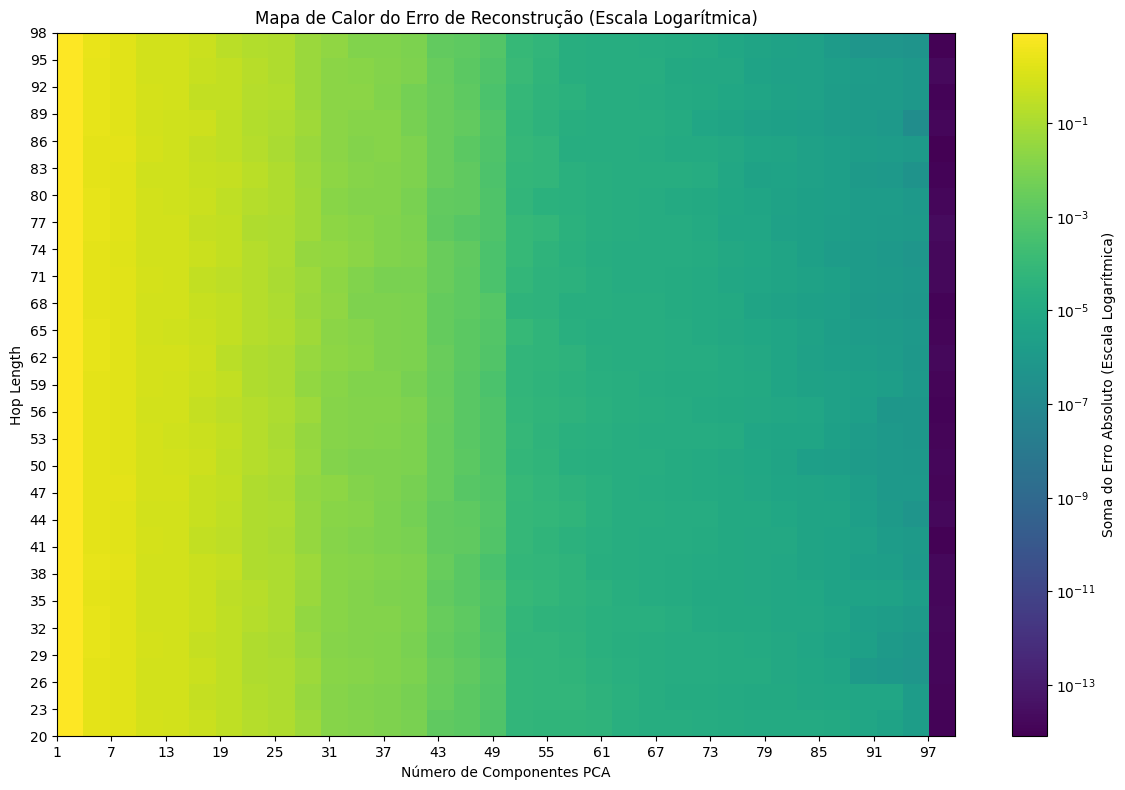

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import librosa
from matplotlib.colors import LogNorm # Import LogNorm

# === 1. Carregar o trecho entre 45s e 47s ===
arquivo = '13 - Impatient.wav'
offset = 45.0
duration = 2.0
audio, sr = librosa.load(arquivo, sr=None, mono=True, offset=offset, duration=duration)

# === 2. Função para dividir em quadros ===
def frame_audio(signal, frame_size, hop_length):
    n_frames = 1 + (len(signal) - frame_size) // hop_length
    frames = np.zeros((n_frames, frame_size))
    for i in range(n_frames):
        start = i * hop_length
        frames[i, :] = signal[start:start+frame_size]
    return frames

# === 3. Definir parâmetros para teste ===
frame_size = 100
# Increased resolution for hop_lengths and components
hop_lengths_to_test = np.arange(20, frame_size + 1, 3)  # Test hop_lengths from 30 to frame_size, step 5
components_to_test = np.arange(1, frame_size + 1, 3) # Test components from 1 to frame_size, step 5

# To store errors: dictionary with (hop_length, n_components) as key
error_map = {}

# === 4. Iterar por todas as combinações de hop_length e n_components ===
print("Starting exhaustive search for hop_length and n_components combinations...")
total_combinations = len(hop_lengths_to_test) * len(components_to_test)
processed_combinations = 0

for current_hop_length in hop_lengths_to_test:
    # print(f"  Processing hop_length: {current_hop_length}") # Uncomment for more detailed progress
    frames = frame_audio(audio, frame_size, current_hop_length)
    if frames.shape[0] == 0:
        # print(f"    No frames generated for hop_length {current_hop_length}. Skipping.")
        processed_combinations += len(components_to_test) # Account for skipped combinations
        continue

    orig_frame = frames[0] # Use the first frame for error calculation

    for n_components in components_to_test:
        processed_combinations += 1
        # Optional: Print progress
        # if processed_combinations % 100 == 0:
        #     print(f"    Progress: {processed_combinations}/{total_combinations} combinations")

        if n_components > frame_size: # Ensure n_components does not exceed feature dimension
            continue
        
        pca = PCA(n_components=n_components)
        
        # Fit PCA on all frames for this hop_length
        compressed = pca.fit_transform(frames)
        reconst = pca.inverse_transform(compressed)
        
        # Calculate error on the first frame's reconstruction
        diff = orig_frame - reconst[0]
        soma_erro = np.sum(np.abs(diff))
        error_map[(current_hop_length, n_components)] = soma_erro

# === 5. Listar combinações em ordem de erro crescente ===
if error_map:
    # Convert dictionary items to a list of (error, (hop_length, n_components)) tuples
    sorted_errors = sorted([(error, combo) for combo, error in error_map.items()])

    print("\n--- Top 100 Combinações de hop_length e Número de Componentes (menor para maior erro) ---")
    # Determine how many combinations to print (up to 100 or all if less than 100)
    num_to_print = min(100, len(sorted_errors))

    for i in range(num_to_print):
        error, (h_len, n_comp) = sorted_errors[i]
        print(f"{i+1}. Erro: {error:.4f}, hop_length: {h_len}, Componentes: {n_comp}")
    
    if len(sorted_errors) > 100:
        print(f"...")
        print(f"Total de combinações calculadas: {len(sorted_errors)}")
else:
    print("No errors were calculated. Please check the input parameters and data.")

# === 6. Plotagem do mapa de calor de erro (com escala logarítmica) ===
if error_map:
    # Prepare data for heatmap
    sorted_keys = sorted(error_map.keys())
    unique_hop_lengths = sorted(list(set([k[0] for k in sorted_keys])))
    unique_components = sorted(list(set([k[1] for k in sorted_keys])))

    error_matrix = np.zeros((len(unique_hop_lengths), len(unique_components)))

    # Find the minimum and maximum error for the LogNorm
    # Add a small epsilon to the minimum error if it's zero, as LogNorm can't handle 0
    min_error_val = min(error_map.values())
    max_error_val = max(error_map.values())
    
    # Ensure min_error_val is not zero for LogNorm
    if min_error_val <= 0:
        min_error_val = np.finfo(float).eps # Use smallest positive float if error is 0 or negative
        # Or, set a specific small value like 1e-6 if you know errors won't be that small naturally

    for i, h_len in enumerate(unique_hop_lengths):
        for j, n_comp in enumerate(unique_components):
            current_error = error_map.get((h_len, n_comp), np.nan)
            # Replace zero errors with a small epsilon for log scale
            if current_error <= 0 and not np.isnan(current_error):
                error_matrix[i, j] = np.finfo(float).eps
            else:
                error_matrix[i, j] = current_error

    plt.figure(figsize=(12, 8))
    
    # Apply Logarithmic Normalization
    plt.imshow(error_matrix, cmap='viridis', origin='lower',
               extent=[min(unique_components), max(unique_components),
                       min(unique_hop_lengths), max(unique_hop_lengths)],
               aspect='auto',
               norm=LogNorm(vmin=min_error_val, vmax=max_error_val)) # Apply LogNorm

    plt.colorbar(label='Soma do Erro Absoluto (Escala Logarítmica)')
    plt.title('Mapa de Calor do Erro de Reconstrução (Escala Logarítmica)')
    plt.xlabel('Número de Componentes PCA')
    plt.ylabel('Hop Length')
    plt.xticks(unique_components[::max(1, len(unique_components)//15)])
    plt.yticks(unique_hop_lengths[::max(1, len(unique_hop_lengths)//15)])
    plt.tight_layout()
    plt.show()

else:
    print("Cannot plot heatmap as no error data was generated.")